# Phan Tấn Tài - 22684181 - Lab 5

# Lab 05 - Bài tập

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

**Bài 01:** Một bài thi trắc nghiệm gồm 10 câu hỏi, mỗi câu có 4 phương án trả lời trong đó chỉ có một phương án đúng. Bạn hãy: 

a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.

b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm

c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)

In [164]:
#a
def so_cau_dung():
    dem_so_cau_dung = 0
    so_cau_hoi = 10
    for _ in range(so_cau_hoi):
        dap_an = np.random.randint(1,4)
        cau_tra_loi = np.random.randint(1,4)
        if cau_tra_loi == dap_an:
            dem_so_cau_dung += 1
            
    return dem_so_cau_dung

so_lan_kiem_tra = 10

for i in range(1, so_lan_kiem_tra):
    print('Lần',i ,'làm đúng số câu',so_cau_dung())

Lần 1 làm đúng số câu 2
Lần 2 làm đúng số câu 4
Lần 3 làm đúng số câu 2
Lần 4 làm đúng số câu 0
Lần 5 làm đúng số câu 5
Lần 6 làm đúng số câu 3
Lần 7 làm đúng số câu 3
Lần 8 làm đúng số câu 4
Lần 9 làm đúng số câu 2


Gọi $K$ là số câu mà sinh viên làm $(0 \le K \le 10)$

$Điểm = 4 \times K + (-2) \times(10-K) = 6K - 20$

Với điểm = 4 ta được:

$4 = 6K - 20 \rArr K = 4$

$\rArr$ Vậy cần 4 câu là đúng là thoả yêu cầu bài toán

In [165]:
#b
k = 4
probability_4_correct = binom.pmf(k, 10, 0.25)
print(f'Xác suất để sinh viên được 4 điểm: {probability_4_correct:.4f}')

Xác suất để sinh viên được 4 điểm: 0.1460


In [166]:
#c
# Tính kỳ vọng E(X)
expected_value = binom.mean(10, 0.25)
print(f'Kỳ vọng E(X) = {expected_value}')

# Tính phương sai Var(X)
variance_value = binom.var(10, 0.25)
print(f'Phương sai Var(X) = {variance_value}')


Kỳ vọng E(X) = 2.5
Phương sai Var(X) = 1.875


**Bài 02:** Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.

In [167]:
lambda_rate = 3

prob_1_call = poisson.pmf(1, lambda_rate)  #1 cuộc gọi
prob_2_call = poisson.pmf(2, lambda_rate)  #2 cuộc gọi
prob_3_call = poisson.pmf(3, lambda_rate)  #3 cuộc gọi

print(f'Xác suất nhận 1 cuộc gọi: {prob_1_call:.4f}')
print(f'Xác suất nhận 2 cuộc gọi: {prob_2_call:.4f}')
print(f'Xác suất nhận 3 cuộc gọi: {prob_3_call:.4f}')


Xác suất nhận 1 cuộc gọi: 0.1494
Xác suất nhận 2 cuộc gọi: 0.2240
Xác suất nhận 3 cuộc gọi: 0.2240


**Bài 03:** Trọng lượng (đơn vị gam) của một loại trái cây có phân phối chuẩn với µ = 500 (gam) gam và $σ^2 = 16 (gam^2)$. Trái cây thu hoạch được phân loại theo trọng lượng như sau:

Loại 1: trên 505 gam

Loại 2: từ 495 – 505 gam

Loại 3: dười 495 gam

a. Hãy tính tỷ lệ của mỗi loại.

b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

c. Bạn hãy mô phỏng lấy 100 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?

In [168]:
mu = 500  
sigma = 4 

z_1 = (505 - mu) / sigma
prob_type_1 = 1 - norm.cdf(z_1)  # P(X > 505)

z_2_lower = (495 - mu) / sigma
z_2_upper = (505 - mu) / sigma
prob_type_2 = norm.cdf(z_2_upper) - norm.cdf(z_2_lower)  # P(495 < X < 505)

z_3 = (495 - mu) / sigma
prob_type_3 = norm.cdf(z_3)  # P(X < 495)

print(f"Tỷ lệ Loại 1 (trên 505 gam): {prob_type_1:.4f}")
print(f"Tỷ lệ Loại 2 (từ 495 đến 505 gam): {prob_type_2:.4f}")
print(f"Tỷ lệ Loại 3 (dưới 495 gam): {prob_type_3:.4f}")

Tỷ lệ Loại 1 (trên 505 gam): 0.1056
Tỷ lệ Loại 2 (từ 495 đến 505 gam): 0.7887
Tỷ lệ Loại 3 (dưới 495 gam): 0.1056


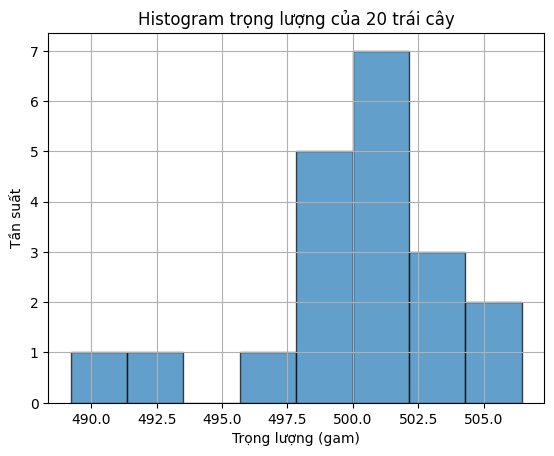

In [169]:
sample_size = 20
samples = np.random.normal(mu, sigma, sample_size)

plt.hist(samples, bins=8, edgecolor='black', alpha=0.7)
plt.title('Histogram trọng lượng của 20 trái cây')
plt.xlabel('Trọng lượng (gam)')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

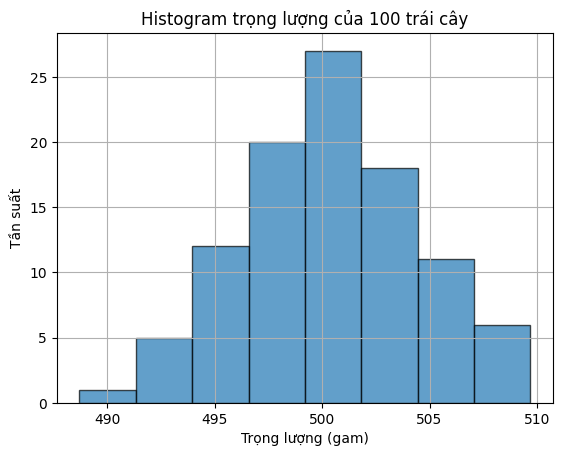

In [170]:
sample_size = 100
samples = np.random.normal(mu, sigma, sample_size)

plt.hist(samples, bins=8, edgecolor='black', alpha=0.7)
plt.title('Histogram trọng lượng của 100 trái cây')
plt.xlabel('Trọng lượng (gam)')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

In [171]:
sample_mean = np.mean(samples)
sample_std = np.std(samples, ddof=1)

print(f'Giá trị trung bình từ mẫu: {sample_mean:.2f} gam')
print(f'Độ lệch chuẩn từ mẫu: {sample_std:.2f} gam')

Giá trị trung bình từ mẫu: 500.44 gam
Độ lệch chuẩn từ mẫu: 4.25 gam


**Bài 04:** Mô phỏng tung một con xúc sắc cân đối đồng chất 5000 lần. Dựa vào giá trị mô phỏng, bạn hãy tìm các giá trị xác suất dưới đây:

a. Xác suất để  số chấm xuất hiện là 4

b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4

c. Giả sử biết số chấm xuất hiện lớn hơn hoặc bằng 4. Hãy tìm xác suất để mặt 6 chấm xuất hiện.

In [172]:
n = 5000
results = np.random.randint(1, 7, n)

# a. Xác suất để số chấm xuất hiện là 4
prob_4 = np.sum(results == 4) / n

# b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4
prob_ge_4 = np.sum(results >= 4) / n

# c. Xác suất để mặt 6 chấm xuất hiện, biết rằng số chấm xuất hiện lớn hơn hoặc bằng 4
count_ge_4 = np.sum(results >= 4)  # Số lần xuất hiện >= 4
count_6_given_ge_4 = np.sum(results == 6) / count_ge_4  # Xác suất xuất hiện mặt 6, điều kiện >= 4

# In kết quả
print(f"a. Xác suất để số chấm xuất hiện là 4: {prob_4:.4f}")
print(f"b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4: {prob_ge_4:.4f}")
print(f"c. Xác suất để mặt 6 chấm xuất hiện biết rằng số chấm >= 4: {count_6_given_ge_4:.4f}")


a. Xác suất để số chấm xuất hiện là 4: 0.1582
b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4: 0.4988
c. Xác suất để mặt 6 chấm xuất hiện biết rằng số chấm >= 4: 0.3216


**Bài 05:** Tạo 5000 số ngẫu nhiên có phân phối nhị thức với n=50, p=0.7 Bạn Hãy

a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3

b. Vẽ đồ thị boxplot

c. Vẽ các đồ thị: tần số, tần suất

In [173]:
n, p = 50, 0.7
sample = 5000
test = binom.rvs(n, p, size=sample)
min_value = np.min(samples)
max_value = np.max(samples)
q1 = np.percentile(samples, 25)  # Q1: Phân vị thứ 1 (25%)
q2 = np.median(samples)          # Q2: Trung vị (50%)
q3 = np.percentile(samples, 75)  # Q3: Phân vị thứ 3 (75%)

print(f"Min: {min_value}")
print(f"Max: {max_value}")
print(f"Q1 (25%): {q1}")
print(f"Q2 (50% - Median): {q2}")
print(f"Q3 (75%): {q3}")
test


Min: 488.7152913879562
Max: 509.6886494522537
Q1 (25%): 497.8644256647117
Q2 (50% - Median): 500.30813541151485
Q3 (75%): 503.3492457873151


array([35, 28, 35, ..., 37, 36, 35])

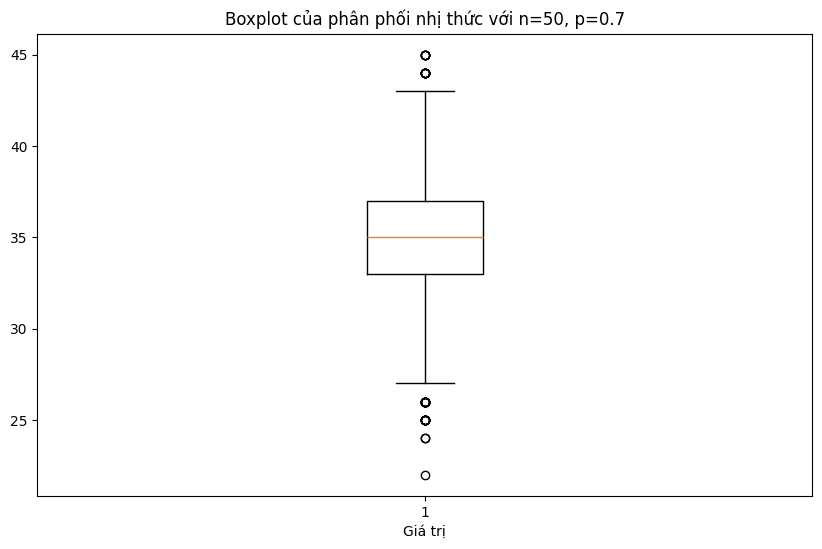

In [174]:
plt.figure(figsize=(10, 6))
plt.boxplot(test)
plt.title('Boxplot của phân phối nhị thức với n=50, p=0.7')
plt.xlabel('Giá trị')
plt.show()

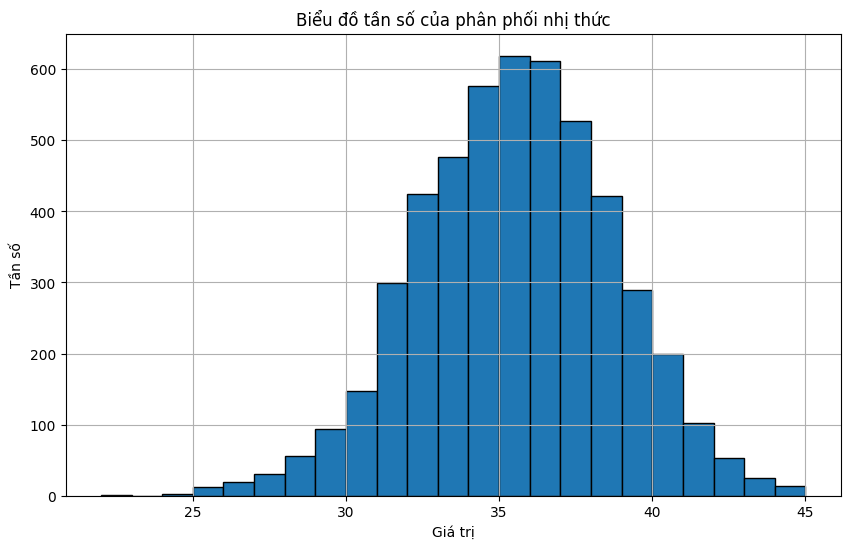

In [175]:
plt.figure(figsize=(10, 6))
plt.hist(test, bins=range(min(test), max(test) + 1), edgecolor='black')
plt.title('Biểu đồ tần số của phân phối nhị thức')
plt.xlabel('Giá trị')
plt.ylabel('Tần số')
plt.grid(True)
plt.show()

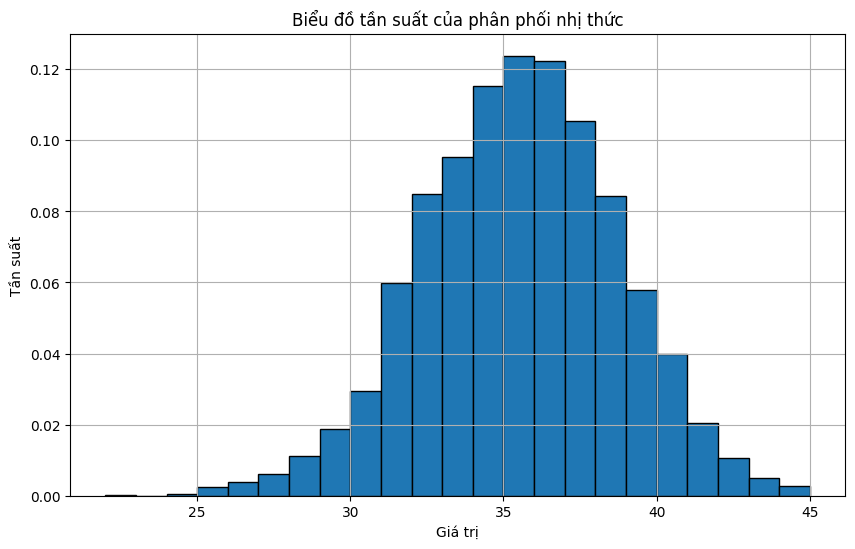

In [176]:
plt.figure(figsize=(10, 6))
plt.hist(test, bins=range(min(test), max(test) + 1),density=True, edgecolor='black')
plt.title('Biểu đồ tần suất của phân phối nhị thức')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

**Bài 6**

Giả sử X là biến ngẫu nhiên rời rạc

a. Hãy cho biết ý nghĩa câu lệnh sau: `binom.pmf(4, 10, 0.6)`

b. Giả sử X có phân phối nhị thức `X ~ B(10, 0.6)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

c. Hãy cho biết ý nghĩa câu lệnh sau: `poisson.pmf(4, 3)`

d. Giả sử X có phân phối Poisson `X ~ P(3)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

Câu lệnh $binom.pmf(4, 10, 0.6)$ sử dụng hàm xác suất khối $PMF (Probability Mass Function)$ của phân phối nhị thức để tính xác suất rằng một biến ngẫu nhiên rời rạc
$X$ có phân phối nhị thức Binomial

$P(X = 4)$

In [177]:
n = 10
p = 0.6

P_X_leq_5 = binom.cdf(5, n, p)  # P(X <= 5)
P_X_geq_4 = 1 - binom.cdf(3, n, p)  # P(X >= 4) = 1 - P(X <= 3)
P_X_eq_5 = binom.pmf(5, n, p)  # P(X = 5)

print(f"P(X <= 5) = {P_X_leq_5:.4f}")
print(f"P(X >= 4) = {P_X_geq_4:.4f}")
print(f"P(X = 5) = {P_X_eq_5:.4f}")

P(X <= 5) = 0.3669
P(X >= 4) = 0.9452
P(X = 5) = 0.2007


Câu lệnh poisson.pmf(4, 3) sử dụng hàm xác suất khối PMF (Probability Mass Function) của phân phối Poisson để tính xác suất rằng một biến ngẫu nhiên 
X có phân phối Poisson với tham số
λ=3

In [178]:
lambda_poisson = 3

P_X_leq_5_poisson = poisson.cdf(5, lambda_poisson)  # P(X <= 5)
P_X_geq_4_poisson = 1 - poisson.cdf(3, lambda_poisson)  # P(X >= 4) = 1 - P(X <= 3)
P_X_eq_5_poisson = poisson.pmf(5, lambda_poisson)  # P(X = 5)

print(f"P(X <= 5) = {P_X_leq_5_poisson:.4f}")
print(f"P(X >= 4) = {P_X_geq_4_poisson:.4f}")
print(f"P(X = 5) = {P_X_eq_5_poisson:.4f}")

P(X <= 5) = 0.9161
P(X >= 4) = 0.3528
P(X = 5) = 0.1008


**Bài 7**

a. Cho biết ý nghĩa của các câu lệnh sau:

- `norm.cdf(2)`

- `norm.cdf(2, 1, 1)`

- `norm.cdf(2, 1, 2)`

b. Cho biết kết quả của câu lệnh sau: `norm.ppf(norm.cdf(2))`

c. Tính các giá trị sau và vẽ hình minh họa cho các giá trị tính được:

- `norm.ppf(0.975)`

- `norm.ppf(0.975, 1, 1)`

- `norm.ppf(0.975, 1, 2)`

d. Giả sử biến ngẫu nhiên X có phân phối chuẩn với kỳ vọng là 24 và phương sai là 16. Hãy tính các giá trị sau:

- $P(X \leq 20)$
- $P(X \ge 29.5)$
- $P(X = 23.8)$

#### 1. `norm.cdf(2)`
- Đây là hàm **cumulative distribution function (CDF)** của phân phối chuẩn chuẩn hóa với trung bình $(\mu = 0)$ và độ lệch chuẩn $(\sigma = 1).$
- `norm.cdf(2)` tính xác suất rằng biến ngẫu nhiên $( X )$ tuân theo phân phối chuẩn chuẩn hóa $( X \sim N(0, 1))$ có giá trị nhỏ hơn hoặc bằng 2.

$P(X \leq 2) = \text{norm.cdf(2)}$

=> Xác suất tích lũy của $ P(X \leq 2))$.

#### 2. `norm.cdf(2, 1, 1)`
- Tính hàm phân phối tích lũy của phân phối chuẩn với trung bình $( \mu = 1 )$ và độ lệch chuẩn $( \sigma = 1 )$.
- `norm.cdf(2, 1, 1)` tính xác suất \( P(X \leq 2) \) cho biến ngẫu nhiên \( X \sim N(1, 1^2) \), tức là \( P(X \leq 2) \) cho phân phối chuẩn với trung bình 1 và độ lệch chuẩn 1.

#### 3. `norm.cdf(2, 1, 2)`
- Tính hàm phân phối tích lũy của phân phối chuẩn với trung bình $( \mu = 1 )$ và độ lệch chuẩn  $(\sigma = 2 )$.
- `norm.cdf(2, 1, 2)` tính xác suất \( P(X \leq 2) \) cho biến ngẫu nhiên $( X \sim N(1, 2^2) )$, tức là $( P(X \leq 2) )$ cho phân phối chuẩn với trung bình 1 và độ lệch chuẩn 2.
---


In [179]:
ppf_0975_norm = norm.ppf(0.975)
ppf_0975_mu1_sigma1 = norm.ppf(0.975, 1, 1)
ppf_0975_mu1_sigma2 = norm.ppf(0.975, 1, 2)

print(f"norm.ppf(0.975) = {ppf_0975_norm:.4f}")
print(f"norm.ppf(0.975, 1, 1) = {ppf_0975_mu1_sigma1:.4f}")
print(f"norm.ppf(0.975, 1, 2) = {ppf_0975_mu1_sigma2:.4f}")

norm.ppf(0.975) = 1.9600
norm.ppf(0.975, 1, 1) = 2.9600
norm.ppf(0.975, 1, 2) = 4.9199


In [180]:
P_X_leq_20 = norm.cdf(20, mu, sigma)
P_X_geq_29_5 = 1 - norm.cdf(29.5, mu, sigma)
P_X_eq_23_8 = 0  # Xác suất của một giá trị cụ thể trong phân phối liên tục là 0

print(f"P(X <= 20) = {P_X_leq_20:.4f}")
print(f"P(X >= 29.5) = {P_X_geq_29_5:.4f}")
print(f"P(X = 23.8) = {P_X_eq_23_8}")

P(X <= 20) = 0.0000
P(X >= 29.5) = 1.0000
P(X = 23.8) = 0


**Bài 8**

Một công ty sản xuất làm ra các chi tiết máy với độ dài các chi tiết có phân phối chuẩn với kỳ vọng là 3000 mm và độ lệch chuẩn là 3 mm. Yêu cầu cho các chi tiết máy này là phải có chiều dài từ 2993 mm đến 3007 mm. Tính tỷ lệ sản phẩm lỗi của công ty

In [182]:
mu = 3000  # Kỳ vọng
sigma = 3  # Độ lệch chuẩn

# Tính xác suất cho P(X < 2993) và P(X > 3007)
P_X_less_than_2993 = norm.cdf(2993, mu, sigma)
P_X_greater_than_3007 = 1 - norm.cdf(3007, mu, sigma)

P_error = P_X_less_than_2993 + P_X_greater_than_3007

print(f"Xác suất sản phẩm lỗi: {P_error:.4f}")

Xác suất sản phẩm lỗi: 0.0196


**Bài 9**

Giả sử điểm thi TOEIC là một biến ngẫu nhiên có phân phối chuẩn với kỳ vọng là 500, độ lệch chuẩn là 8. Bạn hãy:

a. Mô phỏng bằng cách phát sinh ngẫu nhiên điểm thi TOIEC của một nhóm gồm 50 người.

b. Tính điểm trung bình và độ lệch chuẩn về điểm của nhóm.

c. Tìm miền giá trị, và miền phân vị (IQR) của nhóm

d. Cho biết tỷ lệ đạt trên 450 điểm của nhóm. 

e. Vẽ đồ thị histogram của nhóm và so sánh với đồ thị hàm mật độ của phân phối chuẩn với kỳ vọng là 500 và độ lệch chuẩn là 8.

f. Thay vì mô phỏng 50 người, hãy mô phỏng nhóm với 100 người thi. Bạn có nhận xét gì?

In [183]:
#a
mu = 500  # Kỳ vọng (mean)
sigma = 8  # Độ lệch chuẩn (standard deviation)
n_people = 50  # Số người

scores = np.random.normal(mu, sigma, n_people)
print("Điểm thi TOEIC của nhóm 50 người:", scores)

Điểm thi TOEIC của nhóm 50 người: [487.7061088  496.89186183 488.27402749 494.06364744 511.70356229
 496.03125599 495.84231204 513.65867529 504.93104552 506.61423703
 519.1188068  505.3570338  507.45347099 498.22642805 495.10031983
 506.84650083 502.05316236 497.40567141 493.83600793 513.81498298
 492.89534205 502.17965252 510.75137188 495.91881121 500.84197912
 502.11601685 498.85281123 507.20286192 505.58218633 507.87443733
 502.22742874 501.47932859 515.42324028 502.09010856 499.84133654
 510.8346347  496.77551975 503.80756517 501.22464283 517.58080199
 505.07611035 498.56352255 497.37726995 514.89507537 494.80830949
 500.70250494 511.9146395  492.77344264 495.40361413 485.52769937]


In [184]:
# Tính điểm trung bình và độ lệch chuẩn
mean_score = np.mean(scores)
std_score = np.std(scores, ddof=1)  # ddof=1 để tính độ lệch chuẩn mẫu

print(f"Điểm trung bình: {mean_score:.2f}")
print(f"Độ lệch chuẩn: {std_score:.2f}")


Điểm trung bình: 502.15
Độ lệch chuẩn: 7.88


In [185]:
# Tính miền giá trị
min_score = np.min(scores)
max_score = np.max(scores)

# Tính miền phân vị (IQR)
q1 = np.percentile(scores, 25)
q3 = np.percentile(scores, 75)
iqr = q3 - q1

print(f"Miền giá trị: [{min_score:.2f}, {max_score:.2f}]")
print(f"Q1 (25%): {q1:.2f}")
print(f"Q3 (75%): {q3:.2f}")
print(f"Miền phân vị (IQR): {iqr:.2f}")


Miền giá trị: [485.53, 519.12]
Q1 (25%): 496.22
Q3 (75%): 507.11
Miền phân vị (IQR): 10.90


In [186]:
# Tính tỷ lệ đạt trên 450 điểm
num_above_450 = np.sum(scores > 450)
rate_above_450 = num_above_450 / n_people

print(f"Tỷ lệ đạt trên 450 điểm: {rate_above_450:.2%}")


Tỷ lệ đạt trên 450 điểm: 100.00%


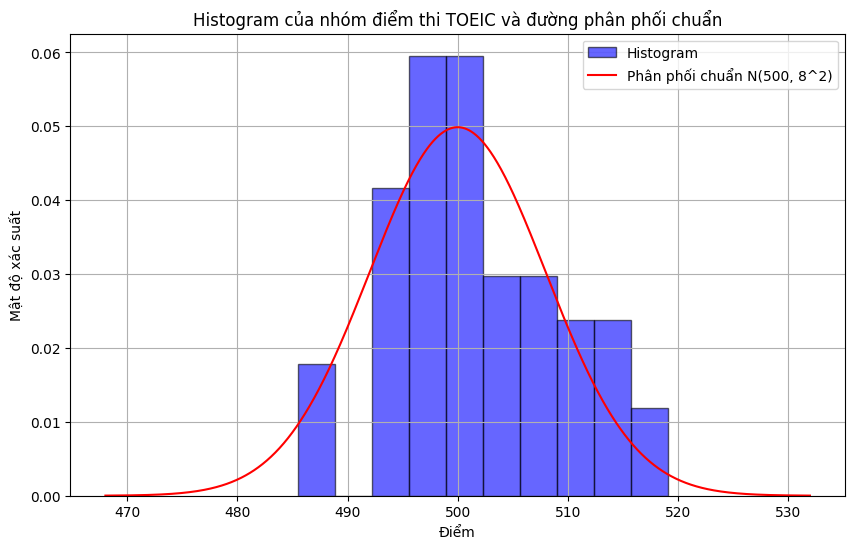

In [187]:
# Vẽ histogram
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=10, density=True, alpha=0.6, color='b', edgecolor='black', label='Histogram')

# Vẽ đường phân phối chuẩn với kỳ vọng là 500 và độ lệch chuẩn là 8
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
plt.plot(x, norm.pdf(x, mu, sigma), 'r', label='Phân phối chuẩn N(500, 8^2)')

plt.title('Histogram của nhóm điểm thi TOEIC và đường phân phối chuẩn')
plt.xlabel('Điểm')
plt.ylabel('Mật độ xác suất')
plt.legend()
plt.grid(True)
plt.show()


In [188]:
n_people_100 = 100

scores_100 = np.random.normal(mu, sigma, n_people_100)

mean_score_100 = np.mean(scores_100)
std_score_100 = np.std(scores_100, ddof=1)

print(f"Điểm trung bình của nhóm 100 người: {mean_score_100:.2f}")
print(f"Độ lệch chuẩn của nhóm 100 người: {std_score_100:.2f}")


Điểm trung bình của nhóm 100 người: 499.33
Độ lệch chuẩn của nhóm 100 người: 7.07


**Bài 10**

Viết một chương trình để mô phỏng việc tung đồng xu và đánh giá phương sai của giá trị mô phỏng của biến ngẫu nhiên X (tung được mặt `Head`) đối với các số lần tung khác nhau. Giả sử  đồng xu phải cân bằng. 

Đối với mỗi N từ 10; 40; 90; 160; 250; 490; 640; 810; 1000, hãy ước tính giá trị của X bằng cách mô phỏng số lần tung đó. 

Bạn nên chạy mỗi mô phỏng 100 lần và sử dụng tập hợp các ước tính để đánh giá phương sai của ước tính x của bạn. Vẽ biểu đồ phương sai này so với N, bạn có nhận xét gì không?

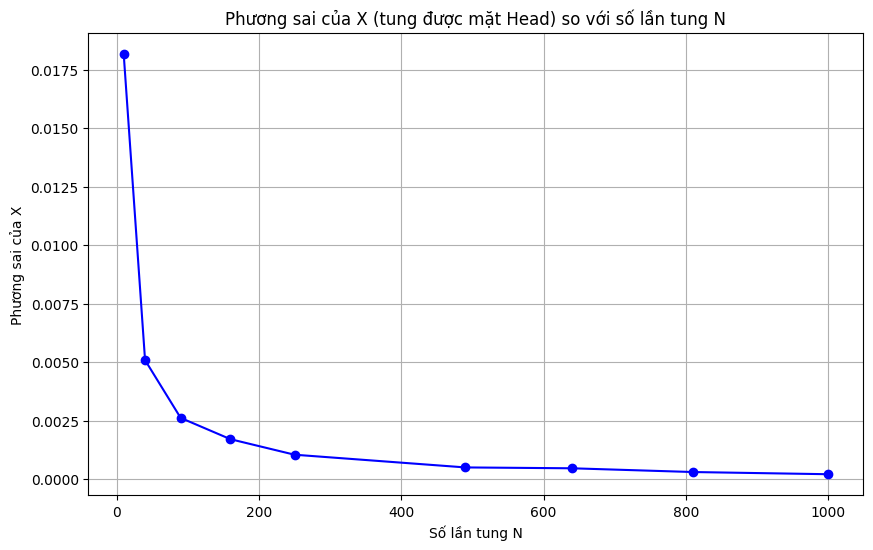

In [190]:
N_values = [10, 40, 90, 160, 250, 490, 640, 810, 1000]

num_simulations = 100

list = []

for N in N_values:
    simulations = []
    
    # Chạy 100 lần mô phỏng cho mỗi N
    for _ in range(num_simulations):
        # Tung N lần đồng xu với xác suất Head là 0.5
        outcomes = np.random.binomial(1, 0.5, N)
        # Tính trung bình của N lần tung (X là số lần ra Head)
        X = np.mean(outcomes)
        simulations.append(X)
    
    # Tính phương sai của 100 lần ước lượng trung bình X
    variance_X = np.var(simulations, ddof=1)
    list.append(variance_X)

plt.figure(figsize=(10, 6))
plt.plot(N_values, list, marker='o', linestyle='-', color='b')
plt.title('Phương sai của X (tung được mặt Head) so với số lần tung N')
plt.xlabel('Số lần tung N')
plt.ylabel('Phương sai của X')
plt.grid(True)
plt.show()


---